In [1]:
import pandas as pd

from transformers import AutoModel, AutoTokenizer, AutoModelForSequenceClassification

pretrained = "../models/finetuned-hatespeech-xlnet"
tokenizer = AutoTokenizer.from_pretrained(pretrained, return_tensors="pt")
# model = AutoModelForSequenceClassification.from_pretrained(pretrained, num_labels=2).to(
#     "cuda:0"
# )
model = AutoModelForSequenceClassification.from_pretrained(
    pretrained,
    problem_type="multi_label_classification",
    num_labels=2
).to("cuda:0")
# model = AutoModel.from_pretrained(pretrained).to("cuda:0")


train = pd.read_csv("../data/hatespeech/train.csv")
test = pd.read_csv("../data/hatespeech/test.csv")
validation = pd.read_csv("../data/hatespeech/valid.csv")

from transformers import pipeline

classifier = pipeline(
    "text-classification",
    model=pretrained,
    tokenizer=tokenizer,
    device=0,
)


Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [2]:
pred = classifier(validation.text.tolist())


In [3]:
model


XLNetForSequenceClassification(
  (transformer): XLNetModel(
    (word_embedding): Embedding(32003, 768)
    (layer): ModuleList(
      (0-11): 12 x XLNetLayer(
        (rel_attn): XLNetRelativeAttention(
          (layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (ff): XLNetFeedForward(
          (layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (layer_1): Linear(in_features=768, out_features=3072, bias=True)
          (layer_2): Linear(in_features=3072, out_features=768, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation_function): GELUActivation()
        )
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (sequence_summary): SequenceSummary(
    (summary): Linear(in_features=768, out_features=768, bias=True)
    (activation): Tanh()
    (first_dropout): Identity()
    (last

In [4]:
y_true = validation.label.tolist()
y_pred = []

for i in pred:
    y_pred.append(int(i["label"][-1]))

print(f"{len(y_true)} : pred {len(y_pred)}")


4232 : pred 4232


In [5]:
pred


[{'label': 'LABEL_0', 'score': 0.54267418384552},
 {'label': 'LABEL_0', 'score': 0.542649507522583},
 {'label': 'LABEL_0', 'score': 0.5427270531654358},
 {'label': 'LABEL_0', 'score': 0.5426781177520752},
 {'label': 'LABEL_0', 'score': 0.5426698923110962},
 {'label': 'LABEL_0', 'score': 0.5426786541938782},
 {'label': 'LABEL_0', 'score': 0.5427175164222717},
 {'label': 'LABEL_0', 'score': 0.5426871180534363},
 {'label': 'LABEL_0', 'score': 0.5426884889602661},
 {'label': 'LABEL_0', 'score': 0.5426338911056519},
 {'label': 'LABEL_0', 'score': 0.5427300333976746},
 {'label': 'LABEL_0', 'score': 0.5427119135856628},
 {'label': 'LABEL_0', 'score': 0.5427137613296509},
 {'label': 'LABEL_0', 'score': 0.5426884889602661},
 {'label': 'LABEL_0', 'score': 0.5426557660102844},
 {'label': 'LABEL_0', 'score': 0.5426267981529236},
 {'label': 'LABEL_0', 'score': 0.5426128506660461},
 {'label': 'LABEL_0', 'score': 0.5426758527755737},
 {'label': 'LABEL_0', 'score': 0.5426651239395142},
 {'label': 'LAB

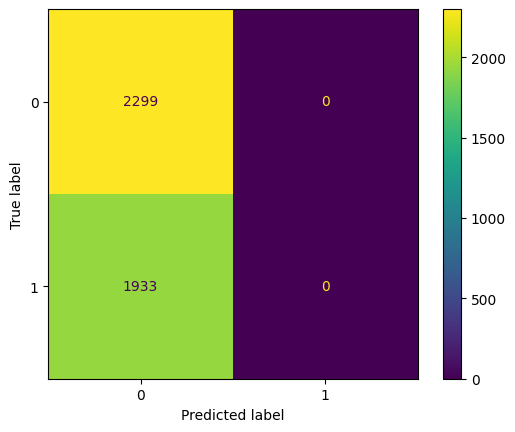

Accuracy: 0.543241965973535
Precision: 0.2716209829867675
Recall: 0.5
F1 score: 0.3520134741999694


c:\Users\Neilc\dev\proj\nlp-thesis-xlnet-tagalog\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()

# Compute the accuracy
acc = accuracy_score(y_true, y_pred)
print("Accuracy:", acc)

# Compute the precision
prec = precision_score(y_true, y_pred, average="macro")
print("Precision:", prec)

# Compute the recall
rec = recall_score(y_true, y_pred, average="macro")
print("Recall:", rec)

# Compute the f1 score
f1 = f1_score(y_true, y_pred, average="macro")
print("F1 score:", f1)

# # Compute the log-loss
# ll = log_loss(y_true, y_pred, labels=[0, 1, 2, 3, 4])
# print("Log-loss:", ll)

# # Compute the AUC-ROC
# auc = roc_auc_score(y_true, y_pred, average="macro", multi_class="ovr")
# print("AUC-ROC:", auc)
